# Taxi Tip Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

In [12]:
raw_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv')
raw_data.head(5)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


<Axes: >

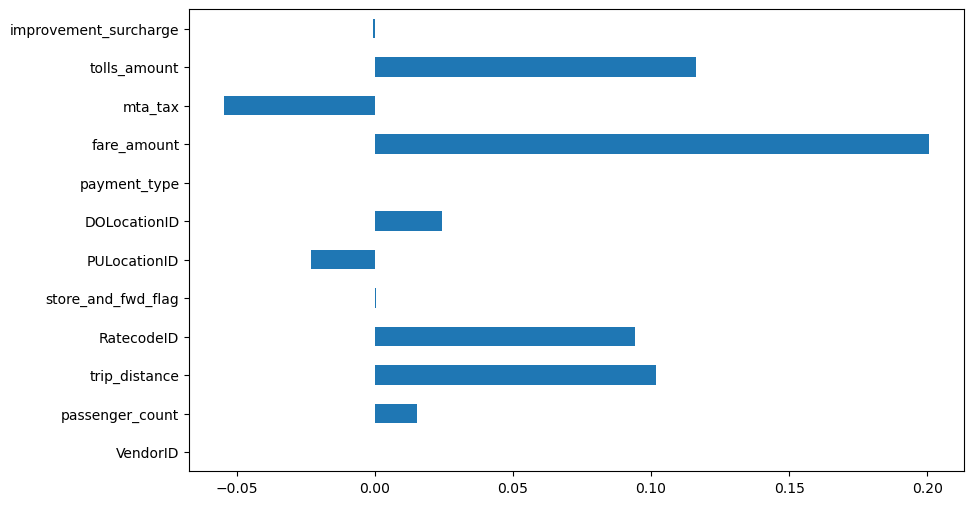

In [15]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [26]:
y = raw_data[['tip_amount']].values.astype('float32')
proc_data = raw_data.drop(['tip_amount'], axis=1)
X = proc_data.values
X = normalize(X, axis=1, norm='l1', copy=False)

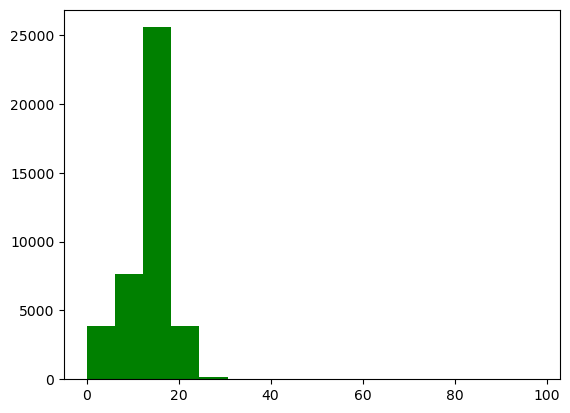

Minimum amount value is  0.01
Maximum amount value is  98.0
90% of the trips have a tip amount less or equal than  18.47


In [30]:
plt.hist(raw_data['tip_amount'], 16, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", min(raw_data['tip_amount']))
print("Maximum amount value is ", max(raw_data['tip_amount']))
print("90% of the trips have a tip amount less or equal than ",raw_data['tip_amount'].quantile(0.9))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=35)

t0 = time.time()
dt.fit(X_train, y_train)
time = time.time()-t0
print(time)

yhat = dt.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(mse, r2, sep=" - ")

0.5295743942260742
24.554687653314353 - 0.027897316738725086


In [41]:
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=12, random_state=35)
dt.fit(X_train, y_train)


yhat = dt.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(mse, r2, sep=" - ")

26.458885658669573 - -0.04748853286367116


In [66]:
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, random_state=35)
dt.fit(X_train, y_train)


yhat = dt.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(mse, r2, sep=" - ")

24.412224294948366 - 0.033537340138301786


In [44]:
correlation_values = raw_data.corr()['tip_amount']
correlation_values.sort_values()

mta_tax                 -0.054488
PULocationID            -0.023086
improvement_surcharge   -0.000727
store_and_fwd_flag       0.000320
passenger_count          0.015081
DOLocationID             0.024348
RatecodeID               0.094075
trip_distance            0.101819
tolls_amount             0.116172
fare_amount              0.200638
tip_amount               1.000000
VendorID                      NaN
payment_type                  NaN
Name: tip_amount, dtype: float64

In [51]:
proc_data = raw_data.drop(['VendorID', 'payment_type', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
X1 = proc_data.values
X1 = normalize(X1, axis=1, norm='l1', copy=False)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

dt1 = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=35)
dt1.fit(X1_train, y_train)

yhat1 = dt1.predict(X1_test)
mse = mean_squared_error(y_test, yhat1)
r2 = r2_score(y_test, yhat1)
print(mse, r2, sep=" - ")

0.4824283682665152 - 0.9809010027781829


In [61]:
proc_data = raw_data.drop(['VendorID', 'payment_type', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
X1 = proc_data.values
X1 = normalize(X1, axis=1, norm='l1', copy=False)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

dt1 = DecisionTreeRegressor(criterion = 'squared_error', max_depth=14, random_state=35)
dt1.fit(X1_train, y_train)

yhat1 = dt1.predict(X1_test)
mse = mean_squared_error(y_test, yhat1)
r2 = r2_score(y_test, yhat1)
print(mse, r2, sep=" - ")

0.15042062570383127 - 0.994044954025518
